# The Spark Foundation-GRIP-Data Science and Business Analytics Intern-
  # October 2021 Batch

Author:-Sagar Samadhan Ingale

Level:-Beginner

Task 1:-Prediction Using Supervised Machine Learning Model

Language:-Python

Dataset link:- http://bit.ly/w-data

Problem Statement:-What will be predicted score if a student studies for 9.25 hrs/day?

### Importing Required Libraries for task

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings;warnings.filterwarnings('ignore')

In [2]:
df_imp=pd.read_csv("http://bit.ly/w-data")
df_imp

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Exploratory Data Analysis

In [3]:
df_imp.head() #Returns the first five rows of the dataset.

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df_imp.tail() #Returns the last five rows of the dataset.

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
df_imp.shape #Returns the total number of Rows & Columns of dataset.

(25, 2)

In [6]:
df_imp.describe() #Returns statistical details like percentile, mean, std etc.

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
df_imp.info() #Shows the summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Data Visualization 

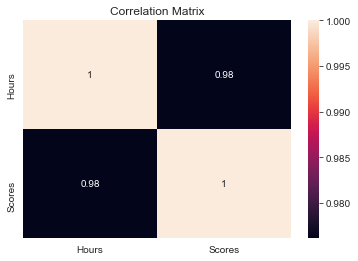

In [8]:
sns.set_style('darkgrid')
sns.heatmap(df_imp.corr(),annot=True)
plt.title('Correlation Matrix')
plt.show()

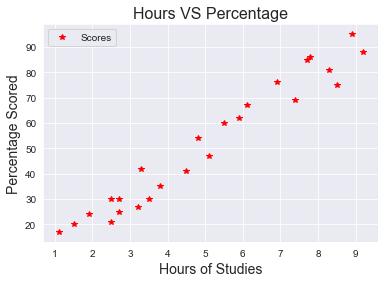

In [9]:
df_imp.plot(x='Hours',y='Scores',style='*',color='r')
plt.title('Hours VS Percentage',fontsize=16)
plt.xlabel('Hours of Studies',fontsize=14)
plt.ylabel('Percentage Scored',fontsize=14)
plt.show()

#### The above Plot insights are:
#### 1)Hours of studies increases and Percentage Scored also
#### 2)That means Hours of studies is directly proportional to Percentage Scored
#### 3)Strong positive correlation between Hours of studies and Percentage Scored  

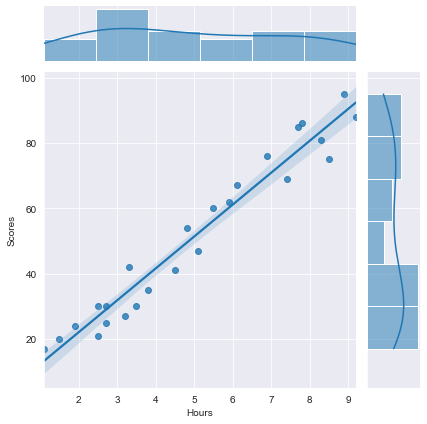

In [10]:
sns.jointplot('Hours','Scores',data=df_imp,kind='reg');

#### In the above Scatter plot X is Hours of students studies and Y is Percentage score
#### Plot also show the Linear Regression fit (Using kind='reg')

### Spliting the dataset as Independent variable Hours as x and Dependent variable Scores as y

In [11]:
x=df_imp.iloc[:,:-1].values
y=df_imp.iloc[:,1].values

In [12]:
print(x) #Display x values

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [13]:
print(y) #Display y value

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


### Spliting the Dataset into the train and test dataset

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=4)

In [15]:
x_train.shape

(18, 1)

In [16]:
y_train.shape

(18,)

In [17]:
x_test.shape

(7, 1)

In [18]:
y_test.shape

(7,)

### Building the Model using Supervised Learning 

In [19]:
from sklearn.linear_model import LinearRegression

df_imp_regressor=LinearRegression()

df_imp_regressor.fit(x_train,y_train) # Fitting the linear regression model into the train dataset

LinearRegression()

In [20]:
y_pred=df_imp_regressor.predict(x_test)#Predicting the value of y 

In [21]:
prediction=pd.DataFrame({'Hrs':[i[0] for i in x_test],'Predicted Marks':[k for k in y_pred]})
prediction

,Hrs,Predicted Marks
0,3.8,40.532064
1,4.8,50.495765
2,2.5,27.579252
3,8.5,87.361461
4,4.5,47.506655
5,7.7,79.390500
6,9.2,94.336052


In [22]:
compared_scores=pd.DataFrame({'Actual Marks':y_test,'Predicted Marks':y_pred})
compared_scores

,Actual Marks,Predicted Marks
0,35,40.532064
1,54,50.495765
2,21,27.579252
3,75,87.361461
4,41,47.506655
5,85,79.390500
6,88,94.336052


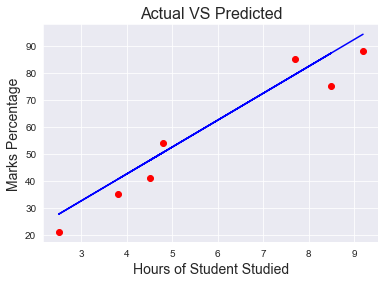

In [23]:
plt.scatter(x=x_test,y=y_test,color='red')
plt.plot(x_test,y_pred,color='blue')
plt.title('Actual VS Predicted',fontsize=16)
plt.xlabel('Hours of Student Studied',fontsize=14)
plt.ylabel('Marks Percentage',fontsize=14)
plt.show()

### Evaluating the Linear Regression Model

In [24]:
from sklearn.metrics import mean_absolute_error,r2_score
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 6.632745418914275


In [25]:
print('R2 score:',r2_score(y_test,y_pred))

R2 score: 0.9142138409326499


In [26]:
hour=[9.25]
solution=df_imp_regressor.predict([hour])
print("Score={}".format(round(solution[0],2)))

Score=94.83


# Solution for the problem is,If student studies for 9.25 hrs/day than the score is 94.83%

# Thank you